In [2]:

import numpy as np
import cv2
import matplotlib.pyplot as plt


Quellen: 
https://www.kaggle.com/code/bhuviranga/cartoonify-image-step-by-step-guide

https://en.wikipedia.org/wiki/Kernel_(image_processing)


# Reading in Images for building filter

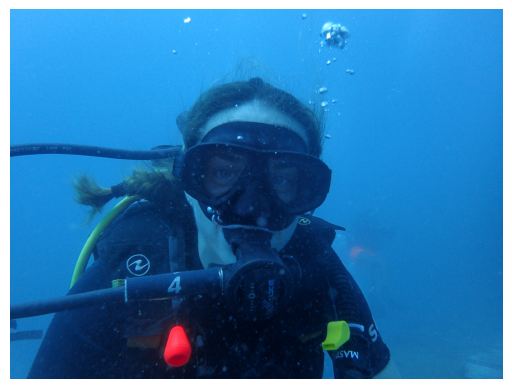

In [118]:
# Load image
image = cv2.imread('P8160078.JPG')

# Display image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Look as the array of the image

In [59]:
# Show shape of image
image.shape

(3456, 4608, 3)

# Resining Image & Noise Removal

# Image Manipulation

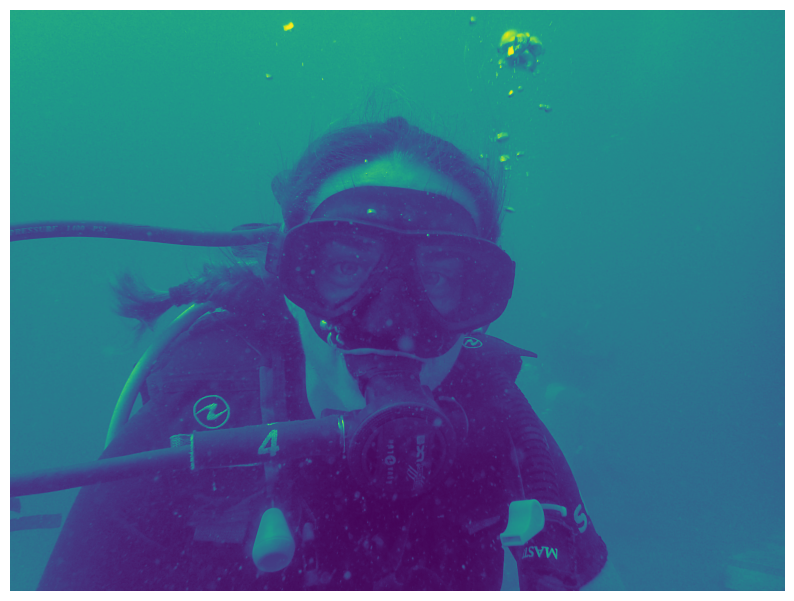

In [123]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gray)
ax.axis('off')
plt.show()


# Filtering


Try out diffrent kernals, to see which one would make a cartoon like output. 


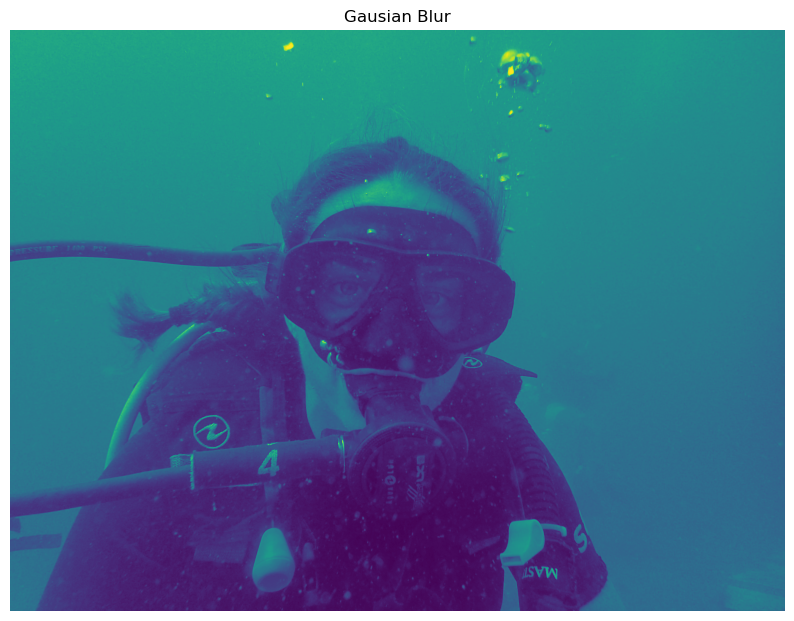

In [124]:
# Gausian Blur 

# Create kernal
kernal_gausian_blur = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

# Apply kernal
gausian_blur = cv2.filter2D(gray, -1, kernal_gausian_blur)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gausian_blur)
ax.axis('off')
ax.set_title('Gausian Blur')
plt.show()

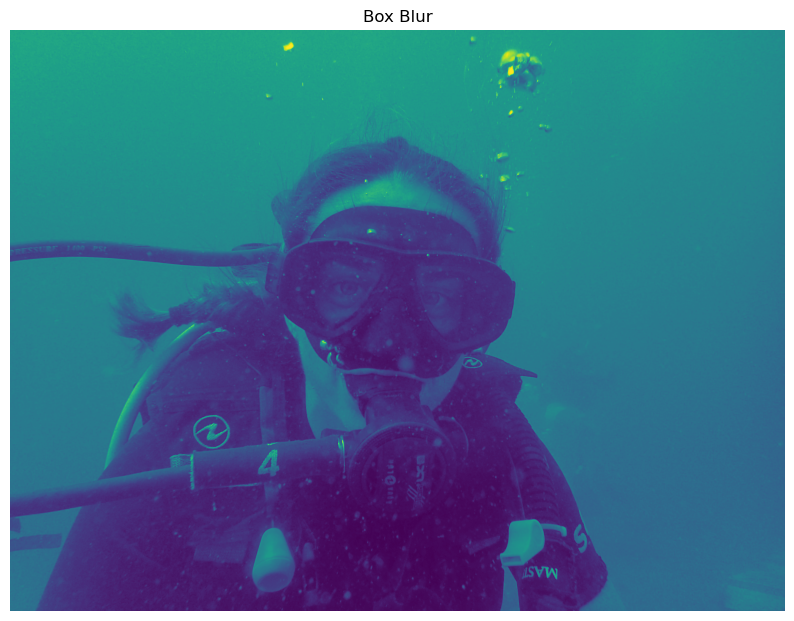

In [134]:
#Box blur

# Create kernal
kernal_box_blur = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

# Apply kernal
box_blur = cv2.filter2D(gray, -1 , kernal_box_blur)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(box_blur)
ax.axis('off')
ax.set_title('Box Blur')
plt.show()

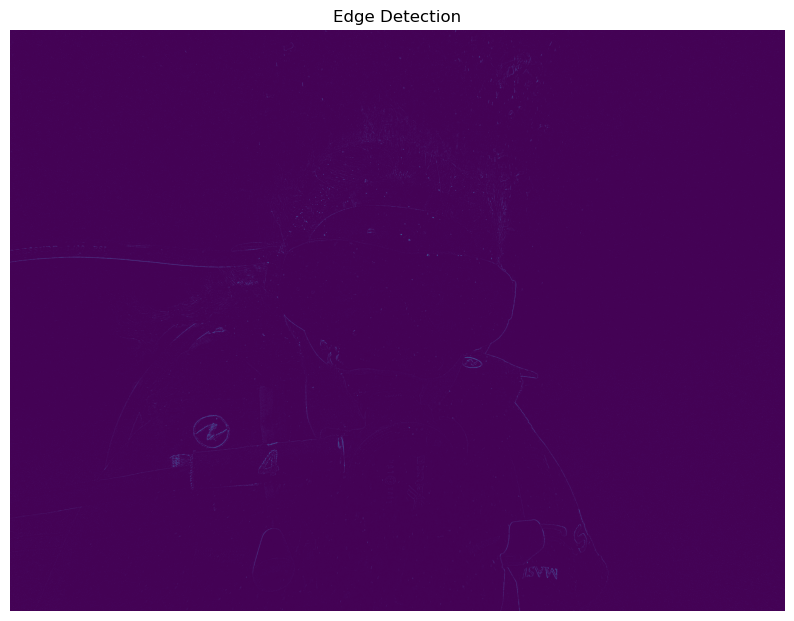

In [135]:
# Edge detection

# Creat kernal
kernal_edge_detection = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Apply kernal
edge_detection = cv2.filter2D(box_blur, -1, kernal_edge_detection)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(edge_detection)
ax.axis('off')
ax.set_title('Edge Detection')
plt.show()

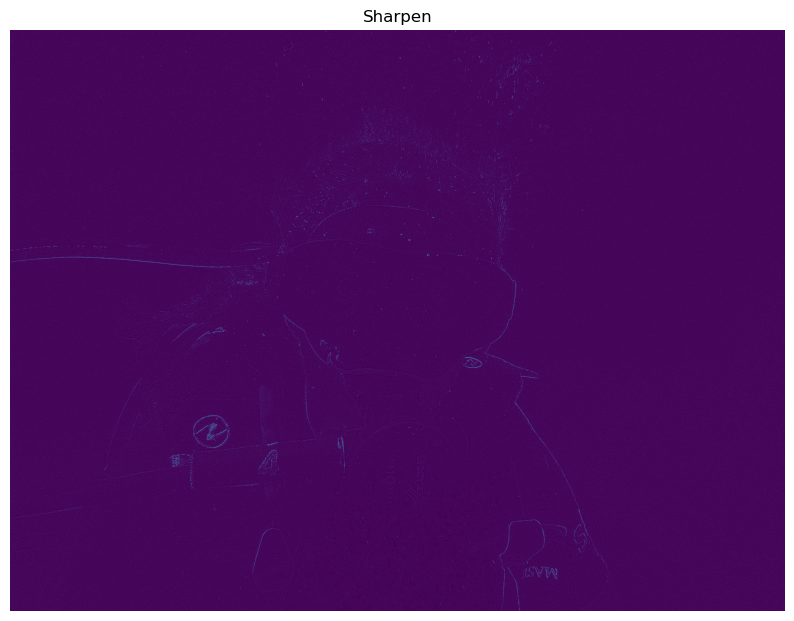

In [136]:
# sharpen

# Create kernal
kernal_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply kernal
sharpen = cv2.filter2D(edge_detection, -1, kernal_sharpen)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(sharpen)
ax.axis('off')
ax.set_title('Sharpen')
plt.show()

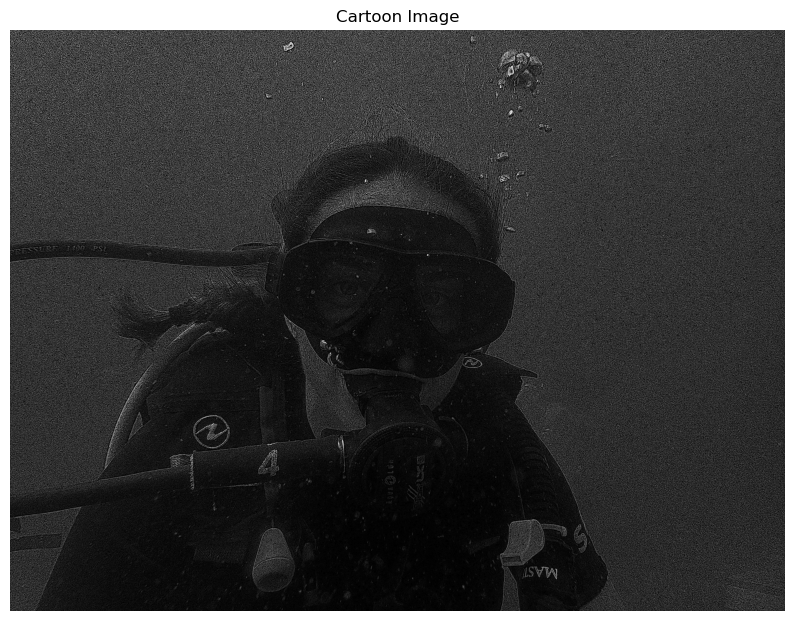

In [137]:
# recolor image
re_color = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
cartoon_image = cv2.bitwise_and(re_color, re_color, mask=edge_detection)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cartoon_image)
ax.axis('off')
ax.set_title('Cartoon Image')
plt.show()

# Creat a function with all the elements


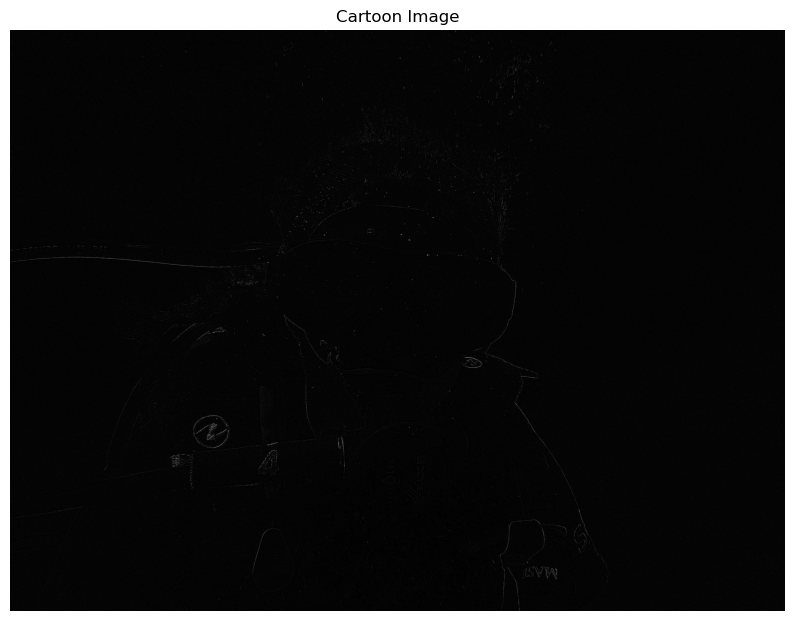

In [143]:
#import image
image = cv2.imread('P8160078.JPG')
# kernals
kernal_box_blur = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
kernal_edge_detection = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernal_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

def cartoon_filter(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    box_blur = cv2.filter2D(gray, -1 , kernal_box_blur)
    edge_detection = cv2.filter2D(box_blur, -1, kernal_edge_detection)
    sharpen = cv2.filter2D(edge_detection, -1, kernal_sharpen)
    re_color = cv2.cvtColor(sharpen, cv2.COLOR_GRAY2BGR)
    cartoon_image = cv2.bitwise_and(re_color, re_color, mask=sharpen)

    return cartoon_image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cartoon_filter(image))
ax.axis('off')
ax.set_title('Cartoon Image')
plt.show()




# Live Stream


In [144]:
def run_camera_cv(cam_id, 
                  window_name="Webcam", 
                  show_ontop=True,
                  width=640,
                  height=480,
                  flip=False, 
                  func=None, 
                  **kwargs):
    """Run a camera feed and display it using OpenCV.

    Args:
        cam_id (int): Camera ID (usually 0).
        window_name (str): Name of the window.
        width (int): Width of the window.
        height (int): Height of the window.
        flip (bool): Flip the image horizontally.
        func (function): Function to apply to the image.
        **kwargs: Keyword arguments for the function.
    """

    cap = cv2.VideoCapture(cam_id)

    # Adjust the camera settings (may work, or not)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)  # adjust width
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)  # adjust height

    # Create named window
    cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)
    # Make the window always on top
    if show_ontop:
        cv2.setWindowProperty(window_name, cv2.WND_PROP_TOPMOST, 1)

    try:
        while True:
            # Read image from capturing device
            success, img = cap.read()
            if not success:
                break
            if flip:
                img = cv2.flip(img, 1)
            if func is not None:
                # Modify image using the provided function
                img = func(img, **kwargs)
            if cartoon_filter is not None:
                img = cartoon_filter(img)
            # Display the image in the named window
            cv2.imshow(window_name, img)
            # Wait and fetch for key input (the above window should be selected)
            key = cv2.waitKey(1) & 0xFF
            # Quit if "q" or "Q" is pressed.
            if key in (ord("q"), ord("Q")): 
                cap.release()
                break

    except KeyboardInterrupt:
        pass
    finally:
        # We should always release the camera
        cap.release()
        # Comment out the following lines if you want to keep the window open
        cv2.destroyAllWindows() 
        cv2.waitKey(1)

In [146]:
####################
# Run demo
####################

# Choose the camera
cam_id = 0

# Window name
window_name = "Webcam"

# Flip the image
flip = True

# Run the camera!
run_camera_cv(cam_id, 
              window_name=window_name, 
              flip=flip)

# First try

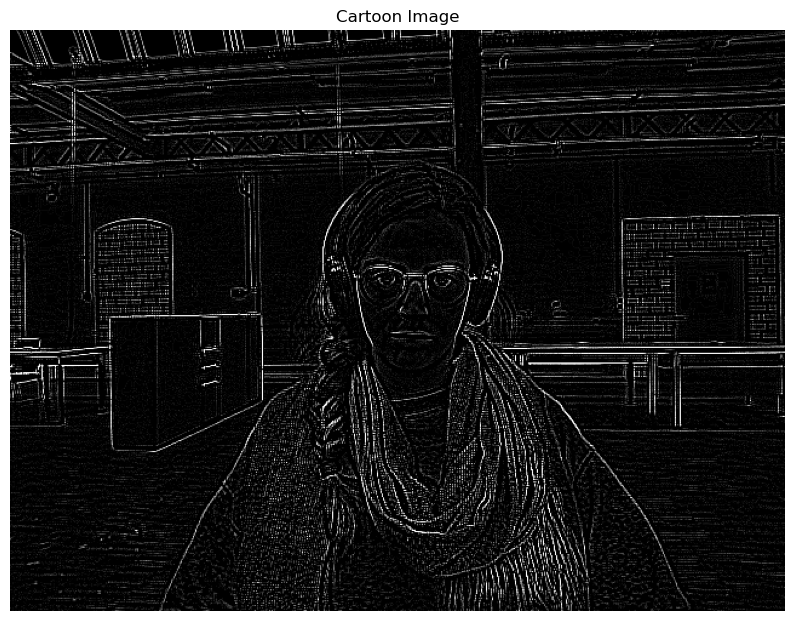

In [147]:
# Display image
image = cv2.imread('Output.png')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)
ax.axis('off')
ax.set_title('Cartoon Image')
plt.show()